## **Importar librerias.**

In [158]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as pl
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

## **Cargar el dataset**

---
Dos opciones: 
1. Descargando la base de datos y subir la carpeta.
2. Mandarlo a llamar desde internet.





Descargar y subir la carpeta con la base de datos *(Opción principal implementada para el programa.)*

In [94]:
def concat_df(train_data, test_data):
  return pd.concat([train_data, test_data], sort=True)

def divide_df(all_data):
  return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

In [144]:
train_data = pd.read_csv("train.csvtest.csv")
test_data = pd.read_csv("test.csv")

df_all = concat_df(train_data, test_data)
dfs = [train_data, test_data]

Manadar a llamar el dataset desde internet.

In [96]:
titanic = sns.load_dataset('titanic')

## Introducción


---
El estatus economico en el dataset se muestra de la siguiente forma:
1.   Upper: Clase alta
2.   Middle: Clse media
3.   Lower: Clase baja

La forma de nombrar a las relaciones familiares se muestra de la siguiente forma:
*   Sibling: Hermano, hermana
*   Spouse: Esposo, esposa (los novios y amantes fueron ignorados)

La forma de nombrar las realciones de familiares se definde de la siguiente manera
*   Parent: Padre, madre
*   Child: Hija, hijo, etc.








Comprobación de calidad de datos.

> Train contiene todas las caracteristicas y posibles predictores, al igual que la variable que se va a predecir.


> Test se usa para el envio, por tanto falta de implementar la variable de destino.


 

In [97]:
print("Train data contains: " + str(len(train_data)) + " rows and " + str(len(train_data.columns)) + " colums")
print("Test data contains: " + str(len(test_data)) + " rows and " + str(len(test_data.columns)) + " colums")

Train data contains: 891 rows and 12 colums
Test data contains: 418 rows and 11 colums


In [98]:
print("First 3 rows of the train data:")
display(train_data.head(3))
print("First 3 rows of the test data:")
display(test_data.head(3))

First 3 rows of the train data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


First 3 rows of the test data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [99]:
print("Missings in the train data:")
display(train_data.isnull().sum())
print("Missings in the test data:")
display(test_data.isnull().sum())

Missings in the train data:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missings in the test data:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

En los datos de entrenamiento tenemos faltas en la columna de edad, cabina y embarcado. En el conjunto de datos de prueba faltan las columnas de edad, tarifa y cabina. 

In [100]:
df_all = concat_df(train_data, test_data)

## Limpieza del dataset

### Edad

In [101]:
print("Missings for age in the entire data set: " + str(df_all['Age'].isnull().sum()))
print("Missings in percentage: " + str(round(df_all['Age'].isnull().sum()/len(df_all)*100,0)) + " % ")

Missings for age in the entire data set: 263
Missings in percentage: 20.0 % 


In [102]:
print('Median for Age separated by Pclass:')
display(train_data.groupby('Pclass')['Age'].median())

print('Median for Age separated by Pclass and Sex:')
display(train_data.groupby(['Pclass', 'Sex'])['Age'].median())

print('Number of cases:')
display(train_data.groupby(['Pclass', 'Sex'])['Age'].count())

Median for Age separated by Pclass:


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Median for Age separated by Pclass and Sex:


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Number of cases:


Pclass  Sex   
1       female     85
        male      101
2       female     74
        male       99
3       female    102
        male      253
Name: Age, dtype: int64

Remplazar los valores vacios con las medias de cada grupo.

In [103]:
df_all = df_all[~df_all.index.duplicated()]
df_all['Age'] = df_all.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

### Tarifa

In [104]:
df_all.loc[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


Tomar los demás casos de personas de clase alta y remplazar la tarifa faltante con la mediana de este grupo.

Loc cases que son similares al de Mr. Thomas. Usar la mediana para remplazar los datos perdidos de este dataset.

In [105]:
mr_thomas = df_all.loc[(df_all['Pclass'] == 3) & (df_all['SibSp'] == 0) & (df_all['Embarked'] == 'S')]['Fare'].median()
print(mr_thomas)
df_all.loc[df_all['Fare'].isnull(), 'Fare'] = mr_thomas

7.925


### Cabina

In [106]:
display(train_data['Cabin'].unique())
print("There are " + str(train_data['Cabin'].nunique()) + " different values for Cabine and " + str(train_data['Cabin'].isnull().sum()) + " cases are missing.")

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

There are 147 different values for Cabine and 687 cases are missing.


Guardar todas las letras de la Cabina en una nueva variable y usar "M" por el que falta.

In [107]:
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')


Text(0.5, 0.98, 'Survival rates for different cabines')

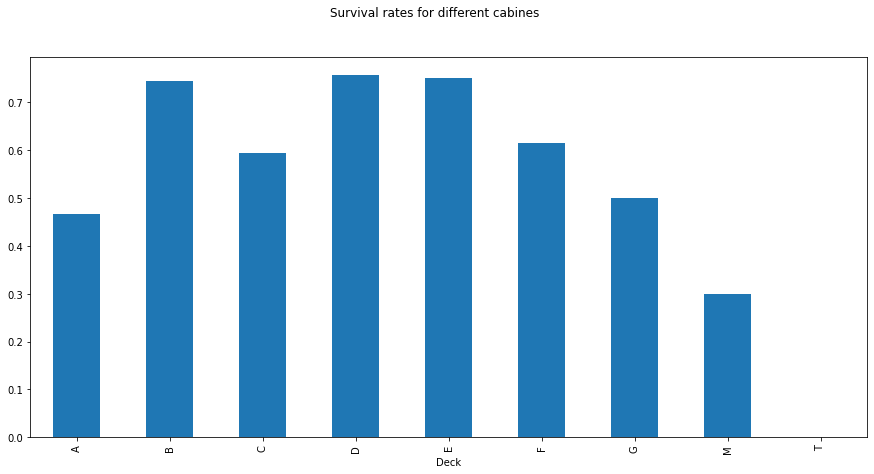

In [108]:
df_all[['Deck', 'Survived']].groupby('Deck')['Survived'].mean().plot(kind='bar', figsize=(15,7))
pl.suptitle('Survival rates for different cabines')


Se observan diferencias grandes en las tazas de supervivencia porque los huespedes en las cabianas superiores llegaron más rápido a los botes.

Agrupar algunos datos.

In [109]:
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx,'Deck'] = 'A'
df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')

df_all['Deck'].value_counts()

M      687
ABC    122
DE      65
FG      17
Name: Deck, dtype: int64

### Embarcados

In [110]:
df_all.loc[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,ABC
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,ABC


In [111]:
df_all.loc[(df_all['Pclass'] == 1) & (df_all['Fare'] <= 80) & (df_all['Deck'] == 'ABC')]['Embarked'].value_counts()

S    38
C    26
Name: Embarked, dtype: int64

Buscar tarifas similares y adjuntar por tarifas similares la clase en la que fueron hospedados.

In [112]:
df_all.loc[df_all['Embarked'].isnull(), 'Embarked'] = 'S'

### Comprobación

Hemos completado todos los valores que faltan en nuestro conjunto de datos. Usamos métodos estadísticos para la edad y la tarifa, creamos una nueva categoría para la cabina e hicimos algunas investigaciones para los desaparecidos en embarcados. Revisemos dos veces si todo está bien ahora.

In [113]:
print("Missing in the data:")
display(df_all.isnull().sum)

Missing in the data:


<bound method DataFrame.sum of        Age  Cabin  Embarked   Fare  ...  SibSp  Survived  Ticket   Deck
0    False   True     False  False  ...  False     False   False  False
1    False  False     False  False  ...  False     False   False  False
2    False   True     False  False  ...  False     False   False  False
3    False  False     False  False  ...  False     False   False  False
4    False   True     False  False  ...  False     False   False  False
..     ...    ...       ...    ...  ...    ...       ...     ...    ...
886  False   True     False  False  ...  False     False   False  False
887  False  False     False  False  ...  False     False   False  False
888  False   True     False  False  ...  False     False   False  False
889  False  False     False  False  ...  False     False   False  False
890  False   True     False  False  ...  False     False   False  False

[891 rows x 13 columns]>

## Creación de funciones


---
Usar el conjunto de datos para probar con diferentes metodos y mejorar el porcenataje de predicción.

Tecnicas implentadas:


* Agrupación de variables continuas (edad)
* Crear nuevas funciones a partir de las variables existentes (titulos)
* Codificar etiquetas de característica númerica (sexo)
* Codificación para características categóricas (Pclass)




### Binning

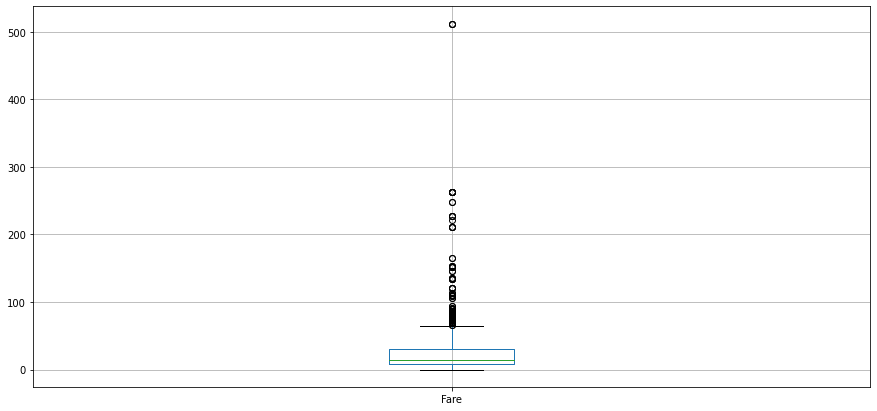

In [114]:
df_all.boxplot(column=['Fare'], figsize=(15,7))

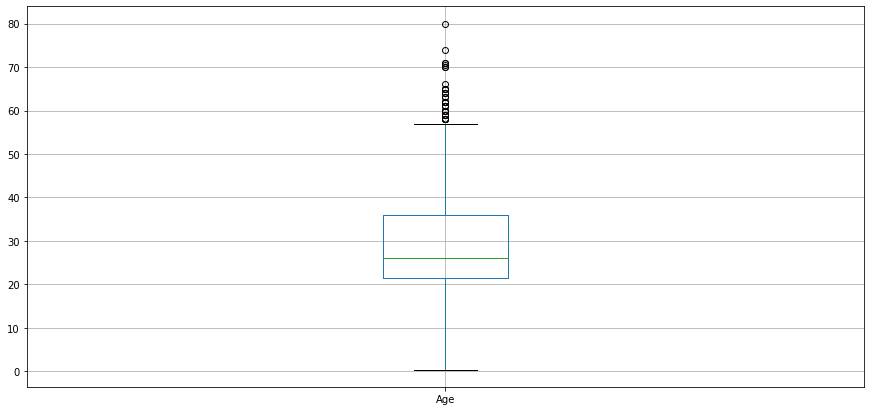

In [115]:
df_all.boxplot(column=['Age'], figsize=(15,7))

Como puede ver, existen valores atípicos tanto para la edad como para la tarifa. El rango de valores es mucho mayor para la tarifa en comparación con la edad. Cortaremos la distribución en pedazos para que los valores atípicos no irriten nuestro algoritmo. Para la tarifa asignaremos el mismo número de casos a cada categoría y para la edad construiremos las categorías en función de los valores de la variable. Esta es también la diferencia entre cut y qcut. Con cut, los bins se forman en función de los valores de la variable, independientemente de cuántos casos caigan en una categoría. Con qcut descomponemos una distribución para que haya el mismo número de casos en cada categoría.

In [116]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 5)
df_all['Age'] = pd.cut(df_all['Age'].astype(int), 5)

In [117]:
print("For age, each category has different number of cases:")
df_all['Age'].value_counts()

For age, each category has different number of cases:


(16.0, 32.0]     495
(32.0, 48.0]     216
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: Age, dtype: int64

In [118]:
print("For fare, each category has nearly a same number of cases:")
df_all['Fare'].value_counts()

For fare, each category has nearly a same number of cases:


(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

En promedio, los pasajeros más jóvenes tienen una mayor probabilidad de supervivencia, al igual que las personas con boletos de precio más altos. 

In [119]:
df_all[['Age', 'Survived']].groupby('Age')['Survived'].mean()

Age
(-0.08, 16.0]    0.550000
(16.0, 32.0]     0.337374
(32.0, 48.0]     0.412037
(48.0, 64.0]     0.434783
(64.0, 80.0]     0.090909
Name: Survived, dtype: float64

In [120]:
df_all[['Fare', 'Survived']].groupby('Fare')['Survived'].mean()

Fare
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.679]       0.424419
(21.679, 39.688]     0.444444
(39.688, 512.329]    0.642045
Name: Survived, dtype: float64

Text(0.5, 0.98, 'Survval rates for age categories')

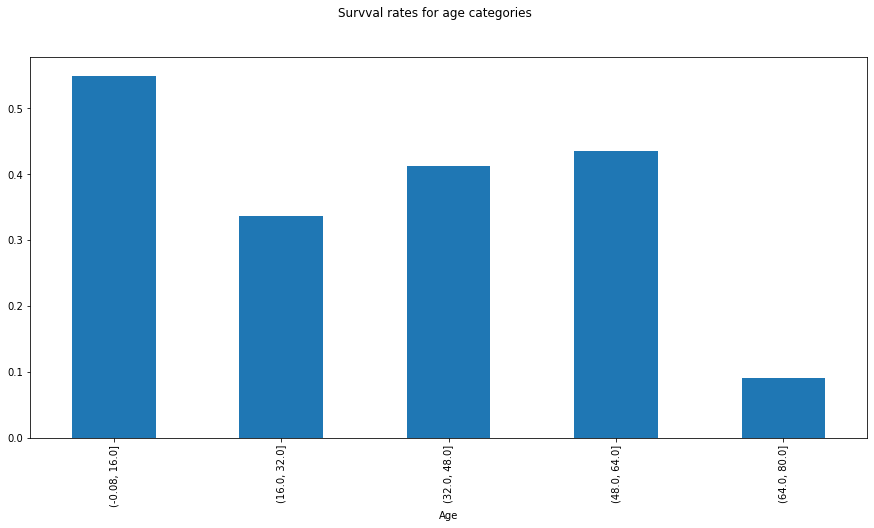

In [122]:
df_all[['Age', 'Survived']].groupby('Age')['Survived'].mean().plot(kind='bar', figsize=(15,7))
pl.suptitle('Survval rates for age categories')

Text(0.5, 0.98, 'Survival rates for fare categories')

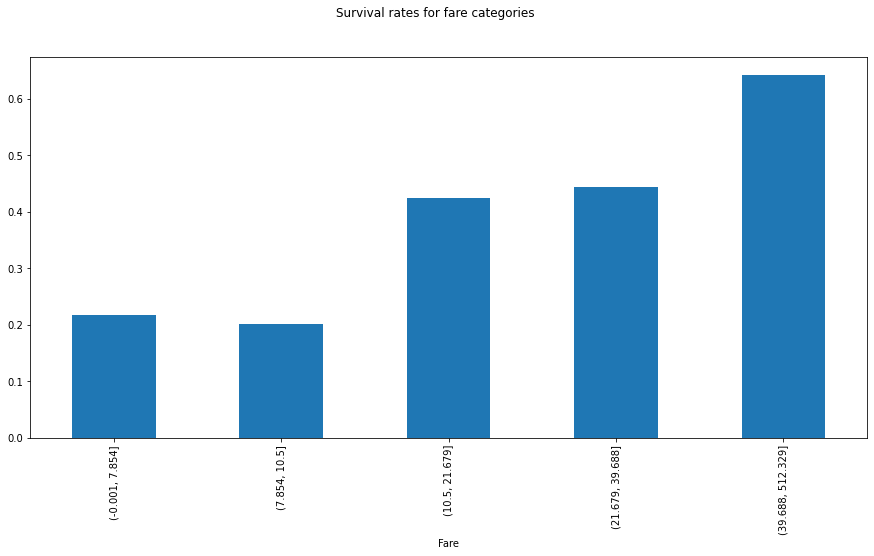

In [124]:
df_all[['Fare', 'Survived']].groupby('Fare')['Survived'].mean().plot(kind='bar', figsize=(15,7))
pl.suptitle('Survival rates for fare categories')

### Crear nuevas funciones a partir de variables existentes

### Tamaño de familia

---
**SibSp** define cuántos hermanos y cónyuges tenía un pasajero y analiza cuántos padres e hijos. Podemos resumir estas variables y agregar 1 (por cada transeúnte) para obtener el tamaño de la familia. 


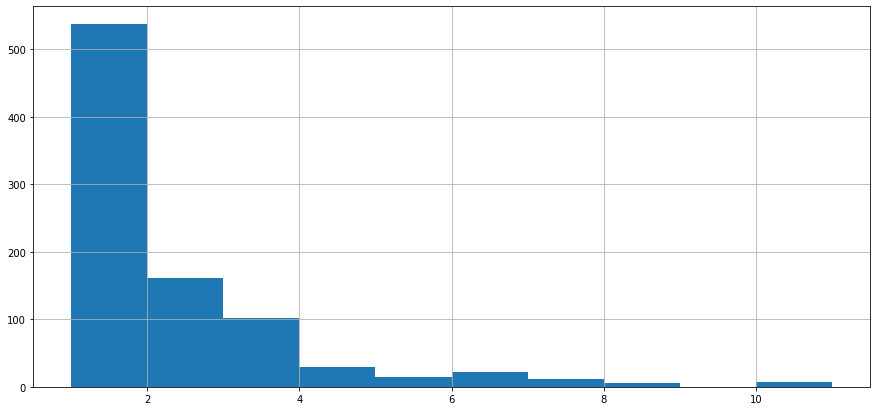

In [126]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

df_all['Family_Size'].hist(figsize=(15,7))

In [127]:
df_all['Family_Size_bin'] = df_all['Family_Size'].map(lambda s: 1 if s == 1 else (2 if s == 2 else (3 if 3 <= s <= 4 else (4 if s >= 5 else 0)))) 

In [128]:
df_all['Family_Size_bin'].value_counts()

1    537
2    161
3    131
4     62
Name: Family_Size_bin, dtype: int64

Probablemente las familias que no son tan numerosas tuvieron más probabiliad de sobrevivir.

Text(0.5, 0.98, 'Survival rates for family size categories')

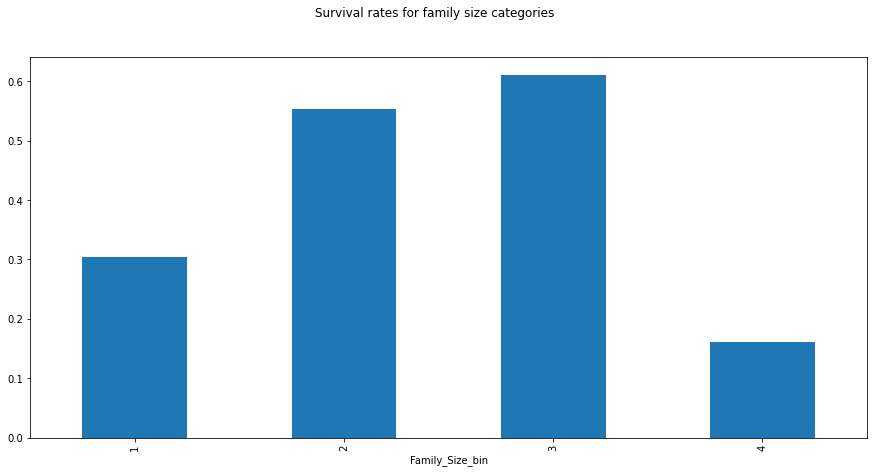

In [129]:
df_all[['Family_Size_bin', 'Survived']].groupby('Family_Size_bin')['Survived'].mean().plot(kind='bar', figsize=(15,7))
pl.suptitle('Survival rates for family size categories')

### Titulo

In [ ]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0]

### Label-and One

In [153]:
encoder = LabelEncoder()
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Age', 'Fare', 'Deck']

for feature in non_numeric_features:
  df_all[feature] = encoder.fit_transform(df_all[feature])

  cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'Family_Size_bin', 'Age', 'Fare']

  encoded_features = []

  for feature in cat_features:
    encoded_feat = OneHotEncoder().fit_transform(df_all[feature].values.reshape(-1, 1)).toarray()
    n = df_all[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range (1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = df_all.index
    encoded_features.append(encoded_df)

df_all = pd.concat([df_all, *encoded_features], axis=1)

TypeError: ignored

In [164]:
df_train, df_test = divide_df(df_all)

KeyError: ignored

## Modelo y predicciones

Usando el modelo de random Forest

In [138]:
drop_cols = ['Embarked', 'Family', 'Family_Size', 'Survived', 'Family_Size_bin', 'Deck', 'Age', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Title', 'Ticket', 'Cabin']

drop_cols2 = ['Embarked', 'Family', 'Family_Size', 'Family_Size_bin', 'Deck', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Title', 'Ticket', 'Cabin']

In [165]:
X = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols2))

#Crear train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Definir los parametros del modelo
model = RandomForestClassifier(criterior='gini',
                               n_estimators=1750,
                               max_depth=7,
                               main_samples_split=6,
                               main_samples_leaf=6,
                               max_features='auto',
                               oob_Score=True,
                               random_state=42,
                               n_jobs=-1,
                               verbose=1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(model.score(X_test1, y_test1))
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output['Survived'] = output['Survived'].astype(int)

NameError: ignored

Usando regresion linear

In [169]:
lr = LinearRegression()

#data[["G3"]] = df[["G3"]]
# Separamos respuesta en una variable Y

X = lr.fit(df_train.drop(columns=drop_cols))
y = df_train['Survived'].values
X_test = lr.fit(df_test.drop(columns=drop_cols2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Entrenar modelo con lineal regression
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


acc_lr = r2_score(y_test, y_pred)

print('Linear regression r2 score: %.2f' % acc_lr)


NameError: ignored

Usando svm

In [170]:
svm = SVR(kernel="linear")

X = svm.fit(df_train.drop(columns=drop_cols))
y = df_train['Survived'].values
X_test = svm.fit(df_test.drop(columns=drop_cols2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
svm.fit(X_train, y_train)
y_pred_svr = svm.predict(X_test)
acc_svr = r2_score(y_test, y_pred_svr)

print('Linear regression SVR: %.2f' % acc_svr)

NameError: ignored